In [1]:
import qtensor
import numpy as np
import torch

from circuit_11 import circuit_11

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
N = 16
FIXED = 12
LAYERS=3

## Train the encoder

Maximize the non-zero amplitudes of non-thrash qubits

In [419]:
parameters = 2*np.pi*torch.rand(LAYERS*(4*N - 4))

### Find peo for the circuit


In [420]:
def get_circ_and_peo(parameters, ordering_algo='rgreedy_0.02_10'):
    opt = qtensor.toolbox.get_ordering_algo('rgreedy_0.02_10')
    composer = qtensor.TorchBuilder(n_qubits=N)
    circ = circuit_11(layers=LAYERS, composer=composer, parameters=parameters)
    tn = qtensor.optimisation.TensorNet.QtreeTensorNet.from_qtree_gates(circ)
    tn.set_free_qubits(range(FIXED, N))
    peo, _ = opt.optimize(tn)
    return peo, circ
    print('Contraction width', opt.treewidth)
peo, circ = get_circ_and_peo(parameters)

In [421]:
steps = 5
sim = qtensor.QtreeSimulator(backend=qtensor.contraction_backends.get_backend('torch'))
for i in range(steps):
    amps = sim.simulate_batch(circ, peo=peo, batch_vars=FIXED)
    print(amps)
    

tensor([-3.0595e-02-1.4798e-02j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -1.1921e-03+1.1183e-03j,  0.0000e+00+-0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         3.1455e-05-1.2761e-05j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         3.2089e-06+2.8544e-06j,  0.0000e+00+-0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -1.3863e-03+2.8080e-04j,  0.0000e+00+-0.0000e+00j,
         0.

tensor([-3.0595e-02-1.4798e-02j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -1.1921e-03+1.1183e-03j,  0.0000e+00+-0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         3.1455e-05-1.2761e-05j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         3.2089e-06+2.8544e-06j,  0.0000e+00+-0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -1.3863e-03+2.8080e-04j,  0.0000e+00+-0.0000e+00j,
         0.

tensor([-3.0595e-02-1.4798e-02j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -1.1921e-03+1.1183e-03j,  0.0000e+00+-0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         3.1455e-05-1.2761e-05j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         3.2089e-06+2.8544e-06j,  0.0000e+00+-0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
        -1.3863e-03+2.8080e-04j,  0.0000e+00+-0.0000e+00j,
         0.

### Define loss
 Negate the sum of amps since normally optimizators are minimising

In [422]:
def amps2loss(amps):
    return -torch.abs(amps*torch.conj(amps)).sum()

In [433]:
steps = 150
lr = 0.05
sim = qtensor.QtreeSimulator(backend=qtensor.contraction_backends.get_backend('torch'))

In [424]:
parameters = 2*np.pi*torch.rand(LAYERS*(4*N - 4), requires_grad=True)
parameters.retain_grad()
parameters

tensor([3.6782, 2.8969, 0.6729, 4.4797, 2.7125, 5.7215, 2.5811, 1.3123, 1.5248,
        0.3088, 3.3146, 0.9390, 4.7173, 3.4828, 2.6633, 0.7210, 1.4247, 2.0947,
        1.9966, 3.9232, 1.0069, 5.1850, 3.2030, 5.7902, 0.8294, 5.3222, 3.7287,
        5.1258, 2.4860, 3.6185, 3.5235, 6.2317, 0.0881, 1.7986, 0.2234, 1.6171,
        2.2740, 6.0648, 2.4160, 4.2020, 5.4518, 0.6793, 4.0828, 3.4845, 2.4255,
        5.7462, 4.6324, 4.1240, 3.2326, 5.8588, 1.0292, 2.8735, 3.8517, 1.6397,
        0.1480, 4.1791, 0.7482, 2.9586, 4.2304, 5.5316, 1.9256, 5.1561, 0.0940,
        0.9475, 1.9428, 0.3537, 2.7444, 2.8299, 1.3072, 5.7318, 2.3284, 5.2001,
        3.4109, 2.8994, 0.7958, 3.4452, 2.8398, 5.5833, 0.5336, 2.0044, 5.0904,
        3.6927, 5.0017, 2.5539, 0.8095, 2.6174, 0.2592, 2.9096, 3.7608, 0.8758,
        0.4141, 3.3690, 2.0625, 3.1971, 3.8833, 5.0417, 4.0523, 3.8271, 3.8103,
        0.8334, 4.1971, 1.2343, 2.9886, 3.8915, 0.9480, 4.7393, 3.5891, 5.2271,
        6.2367, 5.3448, 2.8388, 5.2441, 

In [437]:
peo, circ = get_circ_and_peo(parameters)
for i in range(steps):
    amps = sim.simulate_batch(circ, peo=peo, batch_vars=range(FIXED, N))
    loss = amps2loss(amps)
    loss.backward(retain_graph=True)
    with torch.no_grad():
        parameters -= lr*parameters.grad
    print('loss=', loss.data, 'sum_grad=', np.abs(parameters.grad.detach().numpy().sum()))
    #print(amps.data, np.abs(np.square(amps.detach().numpy())))
    parameters.grad.zero_()
    

loss= tensor(-0.0507, dtype=torch.float64) sum_grad= 0.21171051
loss= tensor(-0.0541, dtype=torch.float64) sum_grad= 0.22204922
loss= tensor(-0.0578, dtype=torch.float64) sum_grad= 0.23334876
loss= tensor(-0.0618, dtype=torch.float64) sum_grad= 0.24572739
loss= tensor(-0.0662, dtype=torch.float64) sum_grad= 0.2593171
loss= tensor(-0.0710, dtype=torch.float64) sum_grad= 0.2742625
loss= tensor(-0.0763, dtype=torch.float64) sum_grad= 0.29072708
loss= tensor(-0.0821, dtype=torch.float64) sum_grad= 0.3088885
loss= tensor(-0.0885, dtype=torch.float64) sum_grad= 0.32892928
loss= tensor(-0.0955, dtype=torch.float64) sum_grad= 0.35104954
loss= tensor(-0.1032, dtype=torch.float64) sum_grad= 0.37545756
loss= tensor(-0.1116, dtype=torch.float64) sum_grad= 0.40235513
loss= tensor(-0.1209, dtype=torch.float64) sum_grad= 0.43192714
loss= tensor(-0.1312, dtype=torch.float64) sum_grad= 0.46434653
loss= tensor(-0.1424, dtype=torch.float64) sum_grad= 0.49973416
loss= tensor(-0.1547, dtype=torch.float64) 

loss= tensor(-0.9978, dtype=torch.float64) sum_grad= 0.04725439
loss= tensor(-0.9979, dtype=torch.float64) sum_grad= 0.046292044
loss= tensor(-0.9979, dtype=torch.float64) sum_grad= 0.045251764
loss= tensor(-0.9980, dtype=torch.float64) sum_grad= 0.044371735
loss= tensor(-0.9980, dtype=torch.float64) sum_grad= 0.043429825
loss= tensor(-0.9981, dtype=torch.float64) sum_grad= 0.042538807
loss= tensor(-0.9981, dtype=torch.float64) sum_grad= 0.04170081
loss= tensor(-0.9982, dtype=torch.float64) sum_grad= 0.040826917
loss= tensor(-0.9982, dtype=torch.float64) sum_grad= 0.04003375
loss= tensor(-0.9982, dtype=torch.float64) sum_grad= 0.03923154
loss= tensor(-0.9983, dtype=torch.float64) sum_grad= 0.038454548
loss= tensor(-0.9983, dtype=torch.float64) sum_grad= 0.03770187
loss= tensor(-0.9984, dtype=torch.float64) sum_grad= 0.037006356
loss= tensor(-0.9984, dtype=torch.float64) sum_grad= 0.03628891
loss= tensor(-0.9984, dtype=torch.float64) sum_grad= 0.03562866
loss= tensor(-0.9985, dtype=torc

In [438]:
parameters

tensor([3.5923, 2.7577, 0.6695, 4.9580, 2.6254, 6.0025, 2.4853, 1.2743, 1.4477,
        0.2279, 3.1293, 1.0023, 4.5035, 3.3879, 2.7220, 0.7273, 1.7445, 2.0874,
        1.9834, 3.9770, 1.0027, 5.2637, 3.0377, 5.6412, 0.9973, 5.2905, 3.5342,
        5.1314, 2.0013, 3.6171, 3.6192, 6.2514, 0.2141, 1.6915, 0.1745, 1.6218,
        2.4928, 6.3377, 2.3821, 4.4530, 5.4226, 0.8959, 4.2689, 3.5046, 2.4315,
        5.7567, 4.8450, 4.3098, 3.0372, 5.8508, 0.9984, 2.9110, 3.8344, 1.6725,
        0.1066, 4.1081, 0.9904, 2.9867, 4.3148, 5.5300, 1.9122, 5.2619, 0.2177,
        0.8533, 2.2839, 0.4926, 2.6869, 3.0731, 1.4962, 5.8107, 2.3647, 5.2715,
        3.5029, 2.8292, 0.8033, 3.4480, 2.7039, 5.7306, 0.9594, 1.9546, 5.0471,
        3.6334, 4.9410, 2.6124, 0.9982, 2.6655, 0.1036, 2.8942, 4.0028, 0.9163,
        0.4053, 3.3690, 2.1520, 2.7822, 4.4864, 4.9650, 4.5013, 3.8638, 3.7295,
        0.7919, 4.1974, 1.1234, 3.0010, 3.9959, 1.0202, 4.7792, 3.6904, 5.2051,
        6.0276, 5.3270, 2.9985, 5.0820, 

## Check by looking at amplitudes after optimization

In [439]:

import matplotlib.pyplot as plt

In [440]:
sim = qtensor.QtreeSimulator(backend=qtensor.contraction_backends.get_backend('torch'))

In [441]:
opt = qtensor.toolbox.get_ordering_algo('rgreedy_0.02_10')
composer = qtensor.TorchBuilder(n_qubits=N)

circ = circuit_11(layers=LAYERS, composer=composer, parameters=parameters)
tn = qtensor.optimisation.TensorNet.QtreeTensorNet.from_qtree_gates(circ)
tn.set_free_qubits(range(N))
peo, _ = opt.optimize(tn)

In [442]:
amps = sim.simulate_batch(circ, peo=peo, batch_vars=N)

In [443]:
flat = amps.flatten().detach().numpy()
flat_sq = np.abs(flat**2)
flat_sq, flat_sq.sum()

(array([1.01653317e-01, 3.25421139e-02, 5.78491107e-03, ...,
        2.14204326e-15, 2.74854059e-15, 1.75336958e-14]),
 1.0000001701592058)

In [448]:
if len(flat_sq)<1030:
    plt.bar(range(len(flat)), flat_sq)
else:
    raise Exception(f'Are you sure want to plot {len(flat_sq)} bars?')

Exception: Are you sure want to plot 65536 bars?

In [444]:
np.sum(flat_sq[:2**12])

0.9991520421656537

In [445]:
np.sum(flat_sq[2**12:2**16])

0.0008481279935522185

In [406]:
sim = qtensor.QtreeSimulator(backend=qtensor.contraction_backends.get_backend('torch'))

In [407]:
sim.target_state = 0
amps = sim.simulate_batch(circ, peo=peo, batch_vars=range(FIXED, N))

In [408]:
flat = amps.flatten().detach().numpy()
flat_sq = np.abs(flat**2)
flat_sq, flat_sq.sum()


(array([0.03502293, 0.00955207, 0.04144788, 0.02694645, 0.02489195,
        0.00746866, 0.00130242, 0.00229547, 0.01712093, 0.01099064,
        0.07633818, 0.02656103, 0.02194115, 0.01890512, 0.01938805,
        0.00119596, 0.01877633, 0.01381068, 0.11524681, 0.04452071,
        0.04953942, 0.02834116, 0.0093878 , 0.00155045, 0.18536697,
        0.07251684, 0.02929152, 0.01164081, 0.02324721, 0.01186137,
        0.03286541, 0.01033195]),
 0.9996643325595096)

<BarContainer object of 32 artists>

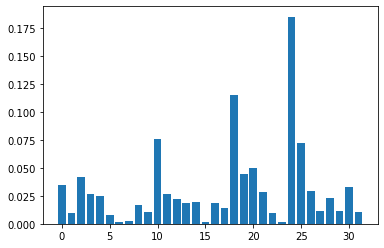

In [409]:
plt.bar(range(len(flat)), flat_sq)

In [413]:
sim.target_state = 2
amps = sim.simulate_batch(circ, peo=peo, batch_vars=range(FIXED, N))

In [416]:
flat = amps.flatten().detach().numpy()
flat_sq = np.abs(flat**2)
flat_sq, flat_sq.sum()

(array([5.29038283e-08, 2.17993241e-08, 1.01851269e-09, 3.21742389e-09,
        2.28754330e-09, 4.42426118e-09, 7.43482136e-09, 4.94771593e-09,
        2.86711279e-08, 8.76710369e-09, 4.13307077e-08, 7.36251842e-09,
        1.96890073e-09, 8.24195837e-09, 1.66807205e-09, 1.34679249e-09,
        1.45542057e-08, 9.91195160e-09, 4.01243622e-08, 1.45491147e-08,
        1.85543237e-08, 1.10686925e-08, 6.84885066e-09, 4.22182425e-10,
        1.69760923e-07, 6.96488243e-08, 2.95434965e-08, 6.79218851e-09,
        1.62243810e-08, 1.44107503e-08, 4.14933216e-08, 8.66396160e-09]),
 6.69962141896097e-07)

<BarContainer object of 32 artists>

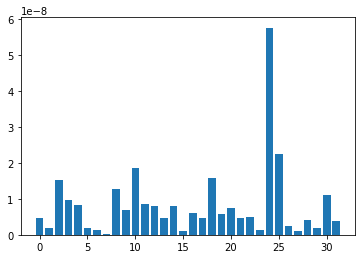

In [412]:
plt.bar(range(len(flat)), flat_sq)